# 实例：泰坦尼克号幸存者的预测

**1、导入所需要的库**

In [61]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

**2、导入数据集，探索数据**

In [30]:
data = pd.read_csv("./datasets/train.csv")

In [31]:
data.info()  #查看数据的详细信息，可以看到有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
data.head()  #显示前n行，默认前5行 data.head(n)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3、对数据集进行预处理**

In [33]:
#删选特征 inplace=True会覆盖原表 =False则不会覆盖，但是要生成一个新的对象
#axis=1删除列
data = data.drop(['Cabin',"Name","Ticket"],inplace=False,axis=1)  

#补充：当axis=0时，要删除指定行可以用labels标签，例如labels=[2,3]删除2、3行

In [34]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [35]:
#处理缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean()) #用均值去填补

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [37]:
#Embarked只有两行缺失值，直接把这两行删掉
#删掉有缺失值的行
data = data.dropna(axis=0)

In [38]:
data.info() #ok,缺失值处理完毕！

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [39]:
labels = data["Embarked"].unique().tolist()
labels

['S', 'C', 'Q']

In [40]:
labels.index('S')

0

In [41]:
#apply()在这一列里执行括号里面的操作
#把Embarked里面的值转换成她对应得索引（变成数字）
data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))

e:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [43]:
#把True和False变成0 1
(data["Sex"] == "male").astype("int")

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [44]:
#性别也可以用Embarked的方法来转换，这里用一种新的方法
# data["Sex"] = (data["Sex"] == "male").astype("int")
data.loc[:,"Sex"] = (data["Sex"] == "male").astype("int")

e:\python\python37\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
data.iloc[:,3] #取出Sex这一列

In [45]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


**数据预处理到这里就算是结束啦。。。**

**接下来，把特征和标签分离开来：**

In [47]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [48]:
data.columns != "Survived"

array([ True, False,  True,  True,  True,  True,  True,  True,  True])

In [50]:
x = data.iloc[:,data.columns != "Survived"]

In [51]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [52]:
y = data.iloc[:,data.columns == "Survived"]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [53]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)

In [54]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
118,119,1,1,24.0,0,1,247.5208,1
486,487,1,0,35.0,1,0,90.0000,0
317,318,2,1,54.0,0,0,14.0000,0
549,550,2,1,8.0,1,1,36.7500,0
190,191,2,0,32.0,0,0,13.0000,0
...,...,...,...,...,...,...,...,...
437,438,2,0,24.0,2,3,18.7500,0
478,479,3,1,22.0,0,0,7.5208,0
173,174,3,1,21.0,0,0,7.9250,0
267,268,3,1,25.0,1,0,7.7750,0


In [55]:
#把索引恢复
#Xtrain.index = range(Xtrain.shape[0])
Xtrain.shape[0]

622

In [56]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [57]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,119,1,1,24.0,0,1,247.5208,1
1,487,1,0,35.0,1,0,90.0000,0
2,318,2,1,54.0,0,0,14.0000,0
3,550,2,1,8.0,1,1,36.7500,0
4,191,2,0,32.0,0,0,13.0000,0
...,...,...,...,...,...,...,...,...
617,438,2,0,24.0,2,3,18.7500,0
618,479,3,1,22.0,0,0,7.5208,0
619,174,3,1,21.0,0,0,7.9250,0
620,268,3,1,25.0,1,0,7.7750,0


**准备工作可算是做完了，终于可以开始跑模型了哈哈哈。。。**

In [59]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.7752808988764045

In [62]:
clf = DecisionTreeClassifier(random_state=25)
#做10次交叉验证
score = cross_val_score(clf,x,y,cv=10).mean() #取10次里面的均值
score

0.7469611848825333

**都比较低呀，接下来慢慢调参**<br>
**接下来来画学习曲线。。。**

0.8166624106230849


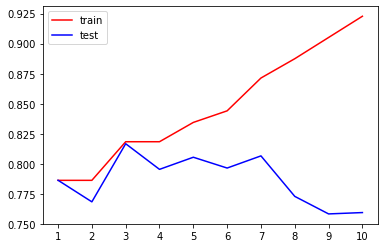

In [65]:
tr=[]
te=[]
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))#显示x轴1-10的标尺
plt.legend()
plt.show()

# 网格搜索

## 能够帮助我们同时调整多个参数的技术，枚举技术

In [ ]:
import numpy as np
# gini_threholds = np.linspace(0,0.5,50) #取50个有顺序的随机数
# entropy_threholds = np.linspace(0,1,50)
# 区别：np.arange(1,5,0.01) #最后一个参数是步长

#parameters:一串参数和这些参数对应得，我们希望网格搜索的参数的取值范围
parameters = {"criterion":("gini","entropy")
              ,"splitter":("best","random")
              ,"max_depth":[*range(1,8)]
              ,"min_samples_leaf":[*range(1,50,10)]
              ,"min_impurity_decrease":[*np.linspace(0,0.5,10)]
}

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)

In [ ]:
GS.best_params_  #从我们输入的参数和参数取值的列表中，返回最佳组合

In [ ]:
GS.best_score_   #网格搜索后的模型的评判标准